In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,Fecha,Nro. Pedido,SerieNF,NroNF,Fecha de Pago,NroPagos,costodelproducto,Marca,Categoria,Codigo SKU Marca,...,Precio Unitario S/I,Precio Lista Unitario,Precio Unitario,PrecioComision,Unidades,Precio_Total,Precio Comision Total,ImpuestoPorcentaje,CostoEnvio,Distribuidor
0,7/8/2022 12:12:00 p. m.,2000003845803152,NaN,NaN,7/8/2022 12:13:00 p. m.,23830367992,"542,938",Neumaster,Neumáticos Agrícolas,1525880457018,...,"$469,656.1983",NaN,"$542,938","$70,581.94",1,"$542,938.","$70,581.94",21,NaN,NaN
1,7/8/2022 12:14:00 p. m.,2000003845811576,NaN,NaN,7/8/2022 12:14:00 p. m.,23830483056,"542,938",Neumaster,Neumáticos Agrícolas,1525880457018,...,"$469,656.1983",NaN,"$542,938","$70,581.94",1,"$542,938.","$70,581.94",21,NaN,NaN
2,4/1/2022 9:52:00 a. m.,5376015148,NaN,NaN,4/1/2022 9:52:00 a. m.,21267755553,"508,339",Neumaster,Neumáticos Agrícolas,1525880535016,...,"$438,702.4793",NaN,"$508,339","$66,084.01",1,"$508,338.53","$66,084.01",21,NaN,NaN
3,9/9/2022 10:22:00 a. m.,2000004180025828,NaN,NaN,9/9/2022 10:22:00 a. m.,25622848940,"361,578",Tornel,Neumáticos Agrícolas,345400575010,...,"$314,552.562",NaN,"$361,578","$47,005.16",1,"$361,578.17","$47,005.16",21,NaN,NaN
4,7/29/2022 9:12:00 a. m.,2000003955112606,NaN,NaN,7/29/2022 9:12:00 a. m.,24399488327,"345,074",Advance,Neumáticos Industriales,127530354124,...,"$285,184.7934",NaN,"$345,074","$44,859.57",1,"$345,073.6","$44,859.57",21,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,5/31/2022 11:39:00 a. m.,2000003639919546,NaN,NaN,5/31/2022 11:39:00 a. m.,22772092626,"33,230",Advance,Ruedas para Podadoras,124530031004,...,"$7,462.8099",NaN,"$8,308","$1,079.99",4,"$33,230.4","$4,319.96",21,"$2,319.98",NaN
1176,4/23/2022 1:25:00 p. m.,5429505309,NaN,NaN,4/23/2022 1:25:00 p. m.,21817979244,"34,400",Advance,Ruedas para Podadoras,124530031004,...,"$7,107.4463",NaN,"$8,600","$1,118.",4,"$34,400.04","$4,472.",21,$567.99,NaN
1177,5/13/2022 4:21:00 p. m.,2000003547916352,NaN,NaN,5/13/2022 4:21:00 p. m.,22335811518,"31,690",Samson,Neumáticos Industriales,466267071012,...,"$1,930.2893",NaN,"$2,336",$363.63,1,"$2,335.65",$363.63,21,NaN,NaN
1178,9/30/2022 3:34:00 p. m.,2000004291729610,NaN,NaN,9/30/2022 3:35:00 p. m.,50046017045,"399,291",Neumaster,Neumáticos Agrícolas,1525260229014,...,$4.6694,NaN,"$199,646","$62,888.37",2,"$399,291.24","$125,776.74",21,NaN,NaN


In [4]:
df.columns

Index(['Fecha', 'Nro. Pedido', 'SerieNF', 'NroNF', 'Fecha de Pago', 'NroPagos',
       'costodelproducto', 'Marca', 'Categoria', 'Codigo SKU Marca',
       'Codigo SKU Propio', 'tiketpromediodelproducto', 'Estado', 'Modo Envio',
       'Catálogo MeLi Buybox', 'TipoPublicacion', 'TipoLogistica',
       'Publicación Full', 'Nombre Pickup', 'Disponibilidad (HS)',
       'Fecha Disponible', 'Nombre Comprador', 'Telefono Comprador',
       'DNI Comprador', 'Unnamed: 24', 'Unnamed: 25', 'Piso', 'Depto',
       'Provincia', 'Localidad', 'Codigo Postal', 'Método de Pago', 'Cuotas',
       'Código Sucursal', 'Kits', 'Costo Unitario', 'PorcentajeComision',
       'Precio Unitario S/I', 'Precio Lista Unitario', 'Precio Unitario',
       'PrecioComision', 'Unidades', 'Precio_Total', 'Precio Comision Total',
       'ImpuestoPorcentaje', 'CostoEnvio', 'Distribuidor'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fecha                     1180 non-null   object 
 1   Nro. Pedido               1180 non-null   int64  
 2   SerieNF                   0 non-null      float64
 3   NroNF                     0 non-null      float64
 4   Fecha de Pago             1180 non-null   object 
 5   NroPagos                  1179 non-null   object 
 6   costodelproducto          1180 non-null   object 
 7   Marca                     1180 non-null   object 
 8   Categoria                 1180 non-null   object 
 9   Codigo SKU Marca          1180 non-null   object 
 10  Codigo SKU Propio         113 non-null    float64
 11  tiketpromediodelproducto  1180 non-null   object 
 12  Estado                    1180 non-null   object 
 13  Modo Envio                1180 non-null   object 
 14  Catálogo

In [6]:
  df = pd.DataFrame(df, columns=["Marca", "Categoria","tiketpromediodelproducto", "TipoPublicacion","Provincia","Cuotas", "Unidades"])

In [7]:
df

,Marca,Categoria,tiketpromediodelproducto,TipoPublicacion,Provincia,Cuotas,Unidades
0,Neumaster,Neumáticos Agrícolas,"$542,938",Clásica,CABA,1,1
1,Neumaster,Neumáticos Agrícolas,"$542,938",Clásica,CABA,1,1
2,Neumaster,Neumáticos Agrícolas,"$508,338",Clásica,CABA,1,1
3,Tornel,Neumáticos Agrícolas,"$361,578",Clásica,CABA,1,1
4,Advance,Neumáticos Industriales,"$345,073",Clásica,CABA,1,1
...,...,...,...,...,...,...,...
1175,Advance,Ruedas para Podadoras,"$8,875",Clásica,Río Negro,1,4
1176,Advance,Ruedas para Podadoras,"$8,875",Clásica,Buenos Aires,1,4
1177,Samson,Neumáticos Industriales,"$33,008",Clásica,CABA,6,1
1178,Neumaster,Neumáticos Agrícolas,"$176,241",Premium,CABA,6,2


In [8]:
colores = ["firebrick","silver","peru","red", "burlywood"]


Text(0.5, 1.0, 'Grafico de barras en relacion al numero de ventas con la categoria del producto')

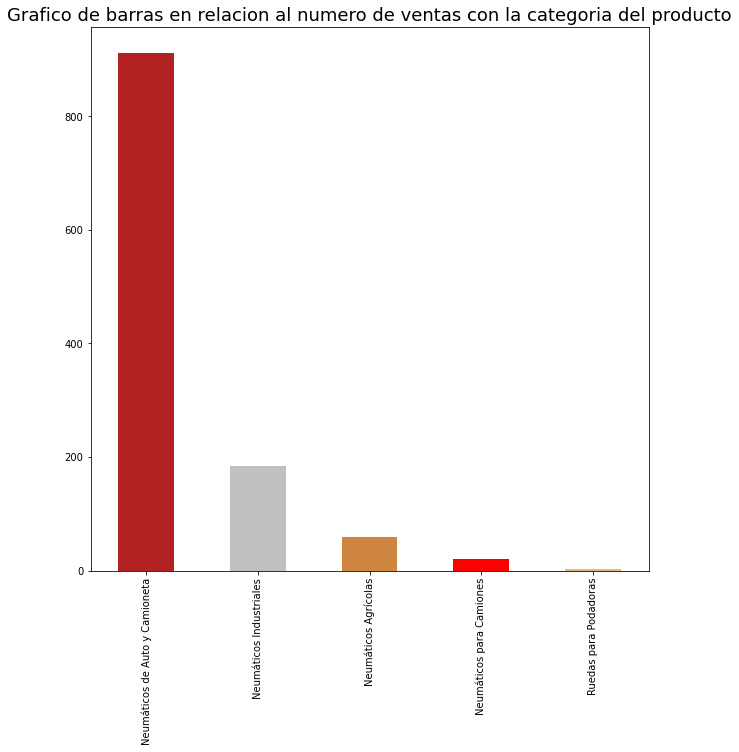

In [9]:
grafica1= df["Categoria"].value_counts().plot(kind="bar", color = colores, figsize= (10,10));
plt.title("Grafico de barras en relacion al numero de ventas con la categoria del producto", color = 'black',
                    size = 18) 



Text(0.5, 1.0, 'Grafico de barras en relacion al numero de ventas con respecto a la Marca del producto')

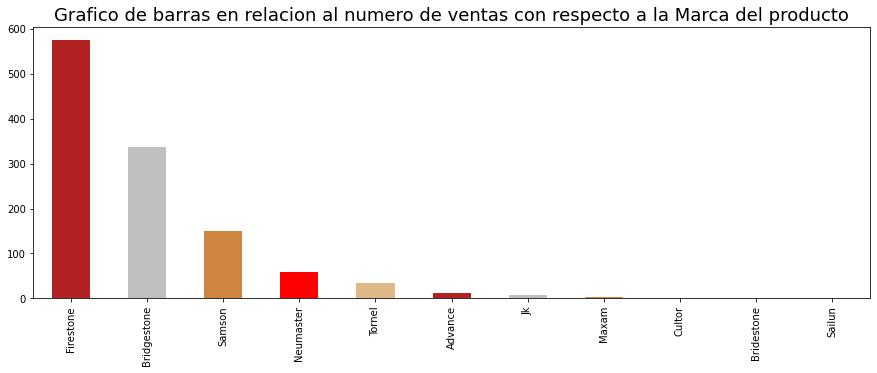

In [10]:
grafica2= df["Marca"].value_counts().plot(kind="bar", color = colores, figsize= (15,5));
plt.title("Grafico de barras en relacion al numero de ventas con respecto a la Marca del producto", color = 'black',
                    size = 18) 


Text(0.5, 1.0, 'Grafico de barras en relacion al numero de ventas con respecto al tipo de publicacion del producto')

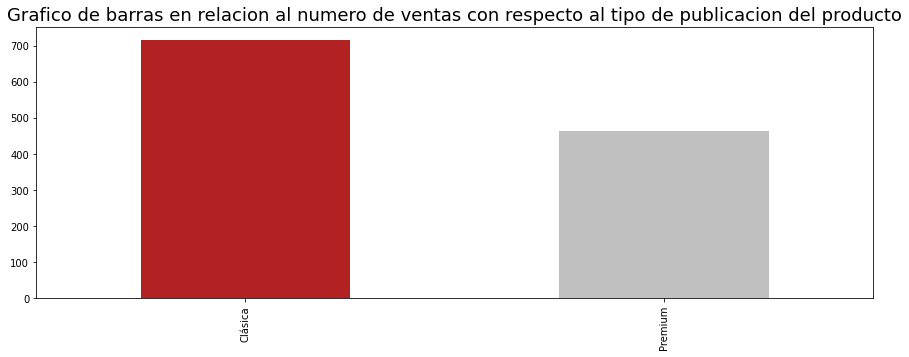

In [11]:
grafica3= df["TipoPublicacion"].value_counts().plot(kind="bar", color = colores, figsize= (15,5));
plt.title("Grafico de barras en relacion al numero de ventas con respecto al tipo de publicacion del producto", color = 'black',
                    size = 18) 


Text(0.5, 1.0, 'Grafico de barras en relacion a las ventas realizadas en cada provincia')

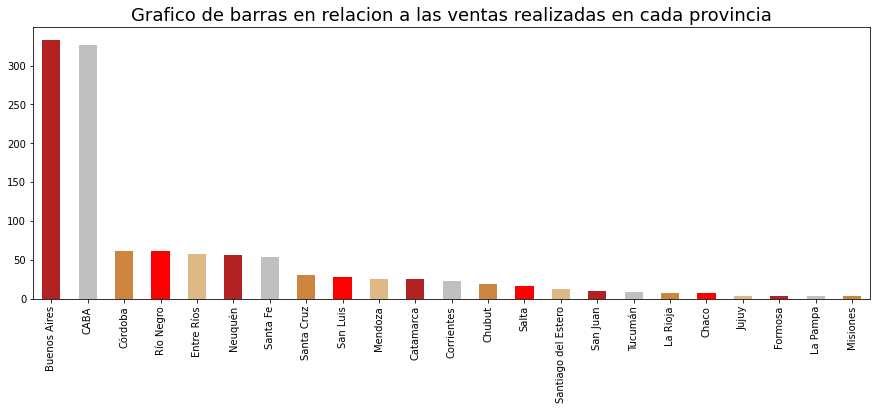

In [12]:
grafica4= df["Provincia"].value_counts().plot(kind="bar", color = colores, figsize= (15,5));
plt.title("Grafico de barras en relacion a las ventas realizadas en cada provincia", color = 'black',
                    size = 18) 


Text(0.5, 1.0, 'Grafico de barras en relacion al numero de cuotas en las que se abono el producto')

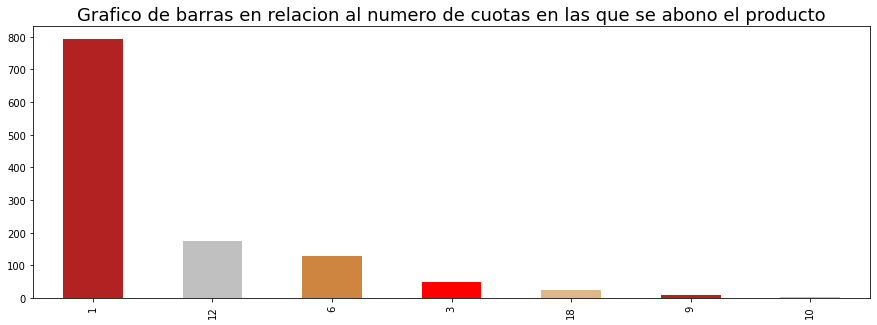

In [13]:
grafica5= df["Cuotas"].value_counts().plot(kind="bar", color = colores, figsize= (15,5));
plt.title("Grafico de barras en relacion al numero de cuotas en las que se abono el producto", color = 'black',
                    size = 18) 


In [14]:
tiket = df.tiketpromediodelproducto.str.replace("$", '' ) #.astype(float).mean
tiket = tiket.str.replace(",", '.' ).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [15]:
df["Provincia"].unique()

array(['CABA', 'Buenos Aires', 'Chubut', 'Neuquén', 'Santiago del Estero',
       'Córdoba', 'Santa Cruz', 'Mendoza', 'Salta', 'San Luis',
       'Catamarca', 'Río Negro', 'Entre Ríos', 'Tucumán', 'Santa Fe',
       'Jujuy', 'Corrientes', 'La Rioja', 'Chaco', 'San Juan', 'Formosa',
       'La Pampa', 'Misiones'], dtype=object)

In [16]:
df["Provincia"] = df["Provincia"].replace({"CABA": 70, "Buenos Aires": 150, "Chubut": 1.737, "Neuquén": 989, "Santiago del Estero": 939, "Córdoba": 646, 'Santa Cruz': 2.207, "Mendoza": 985, "Salta": 1282, "San Luis":749, "Catamarca": 1.127, "Río Negro": 994, "Entre Ríos": 321, "Tucumán": 1.247, "Santa Fe" : 641, "Jujuy": 1.531, "Corrientes": 792, "La Rioja": 986, "Chaco": 1.128, "San Juan": 1.105, "Formosa": 1.000, "La Pampa": 812, "Misiones": 1.141 }) #convertimos nuestras variables categoricas a numericas, con la distancia de capital a cada provincia. 

In [17]:
df["Marca"].unique()

array(['Neumaster', 'Tornel', 'Advance', 'Firestone', 'Bridestone',
       'Samson', 'Cultor', 'Bridgestone', 'Jk', 'Sailun', 'Maxam'],
      dtype=object)

In [18]:
df["Marca"] = df["Marca"].replace({"Bridgestone": 1, "Firestone": 2, "Samson": 3, "Tornel": 4, "Neumaster": 5, "Advance": 6, "Jk": 7, "Cultor": 8, "Maxam": 9, "Sailun" : 10, "Bridestone": 1}) #convertimos la variable categorica "Marca" a numerica segun el nivel de relevancia para la empresa.  

definimos la media facturada para cada Categoria. 

In [19]:
tiket = df.tiketpromediodelproducto.str.replace("$", '' ) #.astype(float).mean
tiket = tiket.str.replace(",", '.' ).astype(float)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [20]:
df["tiket"]=tiket

In [21]:
df = df.drop(["tiketpromediodelproducto"], axis=1)

In [22]:
df

,Marca,Categoria,TipoPublicacion,Provincia,Cuotas,Unidades,tiket
0,5,Neumáticos Agrícolas,Clásica,70.0,1,1,542.938
1,5,Neumáticos Agrícolas,Clásica,70.0,1,1,542.938
2,5,Neumáticos Agrícolas,Clásica,70.0,1,1,508.338
3,4,Neumáticos Agrícolas,Clásica,70.0,1,1,361.578
4,6,Neumáticos Industriales,Clásica,70.0,1,1,345.073
...,...,...,...,...,...,...,...
1175,6,Ruedas para Podadoras,Clásica,994.0,1,4,8.875
1176,6,Ruedas para Podadoras,Clásica,150.0,1,4,8.875
1177,3,Neumáticos Industriales,Clásica,70.0,6,1,33.008
1178,5,Neumáticos Agrícolas,Premium,70.0,6,2,176.241


In [23]:
df["Categoria"].unique()

array(['Neumáticos Agrícolas', 'Neumáticos Industriales',
       'Neumáticos para Camiones', 'Neumáticos de Auto y Camioneta',
       'Ruedas para Podadoras'], dtype=object)

In [24]:
df2 = pd.DataFrame(df, columns=["Categoria","tiket"])

In [25]:
ag = df2[df2["Categoria"] == "Neumáticos Agrícolas"]

In [26]:
mag =ag.mean() 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [27]:
mag #Media de Neumaticos Agricolas. 

tiket    125.748424
dtype: float64

In [28]:
Id  = df2[df2["Categoria"] == "Neumáticos Industriales"] 

In [29]:
Mid =Id.mean() #Media de Neumaticos Industriales. 
Mid 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


tiket    59.672762
dtype: float64

In [30]:
ca = df2[df2["Categoria"] == "Neumáticos para Camiones"]

In [31]:
cam = ca.mean() #Media de Neumaticos Camiones. 
cam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


tiket    162.022714
dtype: float64

In [32]:
ac = df2[df2["Categoria"] == "Neumáticos de Auto y Camioneta"]

In [33]:
mac = ac.mean() #Media de Neumaticos Auto y camioneta. 
mac

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


tiket    47.518196
dtype: float64

In [34]:
rp = df2[df2["Categoria"] == "Ruedas para Podadoras"]

In [35]:
mrp = rp.mean() #Media de Neumaticos para podadoras. 
mrp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


tiket    8.875
dtype: float64

In [36]:
df["Categoria"] = df["Categoria"].replace({"Neumáticos Agrícolas" : 125.748424, "Neumáticos Industriales": 59.672762, "Neumáticos para Camiones" : 162.022714, "Neumáticos de Auto y Camioneta": 47.518196, "Ruedas para Podadoras": 8.875 })

In [37]:
df

,Marca,Categoria,TipoPublicacion,Provincia,Cuotas,Unidades,tiket
0,5,125.748424,Clásica,70.0,1,1,542.938
1,5,125.748424,Clásica,70.0,1,1,542.938
2,5,125.748424,Clásica,70.0,1,1,508.338
3,4,125.748424,Clásica,70.0,1,1,361.578
4,6,59.672762,Clásica,70.0,1,1,345.073
...,...,...,...,...,...,...,...
1175,6,8.875000,Clásica,994.0,1,4,8.875
1176,6,8.875000,Clásica,150.0,1,4,8.875
1177,3,59.672762,Clásica,70.0,6,1,33.008
1178,5,125.748424,Premium,70.0,6,2,176.241


In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["TipoPublicacion"]= encoder.fit_transform(df.TipoPublicacion.values)
df

,Marca,Categoria,TipoPublicacion,Provincia,Cuotas,Unidades,tiket
0,5,125.748424,0,70.0,1,1,542.938
1,5,125.748424,0,70.0,1,1,542.938
2,5,125.748424,0,70.0,1,1,508.338
3,4,125.748424,0,70.0,1,1,361.578
4,6,59.672762,0,70.0,1,1,345.073
...,...,...,...,...,...,...,...
1175,6,8.875000,0,994.0,1,4,8.875
1176,6,8.875000,0,150.0,1,4,8.875
1177,3,59.672762,0,70.0,6,1,33.008
1178,5,125.748424,1,70.0,6,2,176.241


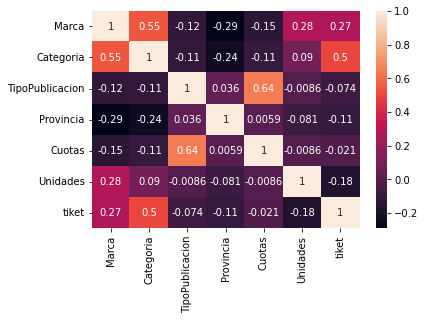

In [39]:
corrmat = df.corr()
sns.heatmap(corrmat, annot = True)

In [40]:
df.isnull().sum()

Marca              0
Categoria          0
TipoPublicacion    0
Provincia          0
Cuotas             0
Unidades           0
tiket              0
dtype: int64

In [41]:
from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
df[['Marca', 'Categoria', 'tiket', 'TipoPublicacion',
       'Provincia', 'Cuotas', 'Unidades']]=scaler.fit_transform(df[['Marca', 'Categoria', 'tiket', 'TipoPublicacion',
       'Provincia', 'Cuotas', 'Unidades']])

In [42]:
df

,Marca,Categoria,TipoPublicacion,Provincia,Cuotas,Unidades,tiket
0,2.324583,3.132538,-0.803583,-0.723880,-0.596994,-0.751163,10.911493
1,2.324583,3.132538,-0.803583,-0.723880,-0.596994,-0.751163,10.911493
2,2.324583,3.132538,-0.803583,-0.723880,-0.596994,-0.751163,10.137316
3,1.508212,3.132538,-0.803583,-0.723880,-0.596994,-0.751163,6.853552
4,3.140955,0.195487,-0.803583,-0.723880,-0.596994,-0.751163,6.484252
...,...,...,...,...,...,...,...
1175,3.140955,-2.062465,-0.803583,1.846897,-0.596994,4.577728,-1.038199
1176,3.140955,-2.062465,-0.803583,-0.501302,-0.596994,4.577728,-1.038199
1177,0.691840,0.195487,-0.803583,-0.723880,0.508203,-0.751163,-0.498222
1178,2.324583,3.132538,1.244426,-0.723880,0.508203,1.025134,2.706625


Text(0.5, 1.0, 'METODO DE CODO')

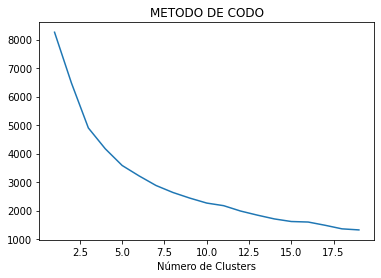

In [43]:
wcss = []

for i in range(1, 20):
  kmeans = KMeans(n_clusters= i, max_iter = 300)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss)
plt.xlabel("Número de Clusters")
plt.title("METODO DE CODO")

In [44]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [45]:
centroids

array([[-0.29591398, -0.30475458,  1.22131079,  0.08516771,  0.82903506,
        -0.05748482, -0.16156333],
       [-0.07128963, -0.2360221 , -0.80358333,  0.04219536, -0.53383979,
         0.01286548, -0.17153431],
       [ 1.90323025,  3.08607001, -0.25304318, -0.69788287, -0.25236247,
         0.18473552,  1.95742636]])

In [46]:
df["lb"]=labels

Text(0.5, 1.0, 'Grafico de barras en relacion a labels.')

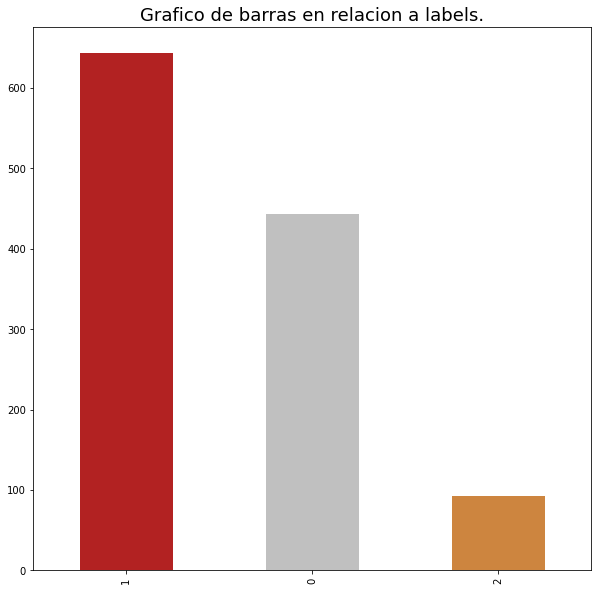

In [47]:
grafica6= df["lb"].value_counts().plot(kind="bar", color = colores, figsize= (10,10));
plt.title("Grafico de barras en relacion a labels.", color = 'black',
                    size = 18) 

In [48]:
X = pd.DataFrame(df, columns=["Marca","Categoria","TipoPublicacion","Provincia", "Cuotas","Unidades", "tiket"])
y = pd.DataFrame(df, columns=["lb"])


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25,
                                                      random_state=0)

In [50]:
from imblearn.under_sampling import NearMiss
from collections import Counter

us = NearMiss(n_neighbors=3, version=2)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

#Arboles de decision. 

In [51]:
add = DecisionTreeClassifier(max_depth=4)
add.fit(X_train_res, y_train_res)


DecisionTreeClassifier(max_depth=4)

In [52]:
predadd = add.predict(X_test)
predadd

array([0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2,
       2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

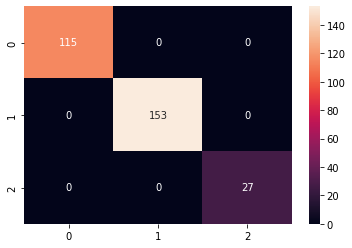

[[115   0   0]
 [  0 153   0]
 [  0   0  27]]


In [53]:
matrizadd = confusion_matrix(y_test, predadd) 
sns.color_palette('icefire')
sns.heatmap(matrizadd, annot=True, fmt='d')
plt.show()
print(matrizadd)

In [54]:
reporte1 = classification_report(y_test, predadd)
print(reporte1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00        27

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



#Bayes Ingenuos 

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
gaun = GaussianNB()

In [57]:
gaun = gaun.fit(X_train_res, y_train_res)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
pregaun = gaun.predict(X_test)
pregaun

array([0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2,
       2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

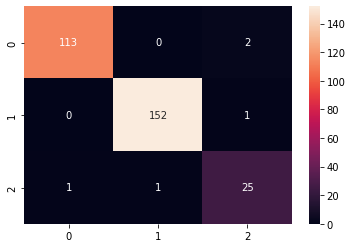

In [59]:
matrizgaun = confusion_matrix(y_test, pregaun) 
sns.color_palette('icefire')
sns.heatmap(matrizgaun, annot=True, fmt='d')
plt.show()

In [60]:
reporte2 = classification_report(y_test, pregaun)
print(reporte2)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       115
           1       0.99      0.99      0.99       153
           2       0.89      0.93      0.91        27

    accuracy                           0.98       295
   macro avg       0.96      0.97      0.96       295
weighted avg       0.98      0.98      0.98       295



#Vecinos Cercanos 

In [61]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)


In [62]:
knn.fit(X_train_res, y_train_res)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [63]:
preknn = knn.predict(X_test)
preknn

array([0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2,
       2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

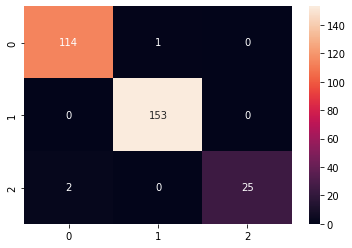

In [64]:
matrizknn = confusion_matrix(y_test, preknn) 
sns.color_palette('icefire')
sns.heatmap(matrizknn, annot=True, fmt='d')
plt.show()

In [65]:
reporte3 = classification_report(y_test, preknn)
print(reporte3)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       115
           1       0.99      1.00      1.00       153
           2       1.00      0.93      0.96        27

    accuracy                           0.99       295
   macro avg       0.99      0.97      0.98       295
weighted avg       0.99      0.99      0.99       295



#Maquinas de soporte Vectorial

In [66]:
from sklearn import svm
clf = svm.SVC(kernel= "poly")
clf.fit(X_train_res,y_train_res)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [67]:
preclf = clf.predict(X_test)
preclf

array([0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2,
       2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

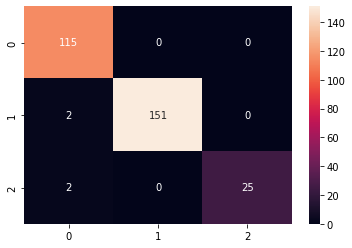

In [68]:
matrizclf = confusion_matrix(y_test, preclf) 
sns.color_palette('icefire')
sns.heatmap(matrizclf, annot=True, fmt='d')
plt.show()

In [69]:
reporte4 = classification_report(y_test, preclf)
print(reporte4)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       115
           1       1.00      0.99      0.99       153
           2       1.00      0.93      0.96        27

    accuracy                           0.99       295
   macro avg       0.99      0.97      0.98       295
weighted avg       0.99      0.99      0.99       295



#Redes Neuronales 

In [70]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,50,25),activation = 'logistic' ,solver='adam',max_iter=1000)

In [71]:
mlp.fit(X_train_res,y_train_res)
predRN = mlp.predict(X_test)
predRN

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2,
       2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

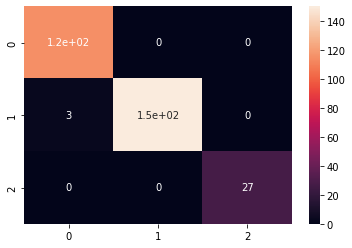

[[115   0   0]
 [  3 150   0]
 [  0   0  27]]


In [72]:
matrizRN = confusion_matrix(y_test, predRN)
sns.heatmap(matrizRN, annot=True)
plt.show()
print(matrizRN)

In [73]:
print(classification_report(y_test, predRN))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       115
           1       1.00      0.98      0.99       153
           2       1.00      1.00      1.00        27

    accuracy                           0.99       295
   macro avg       0.99      0.99      0.99       295
weighted avg       0.99      0.99      0.99       295



#Discriminante lineal y cuadratico

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)


In [75]:
lda.fit(X_train_res, y_train_res)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=1)

In [76]:
predlda = lda.predict(X_test)


In [77]:
predlda

array([0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2,
       2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

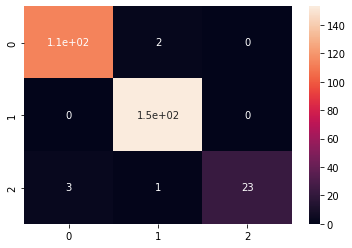

[[113   2   0]
 [  0 153   0]
 [  3   1  23]]


In [78]:
matrizlda = confusion_matrix(y_test, predlda)
sns.heatmap(matrizlda, annot=True)
plt.show()
print(matrizlda)

In [79]:
print(classification_report(y_test, predlda))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       115
           1       0.98      1.00      0.99       153
           2       1.00      0.85      0.92        27

    accuracy                           0.98       295
   macro avg       0.98      0.94      0.96       295
weighted avg       0.98      0.98      0.98       295

